In [ ]:
#===========================
LOGISTIC REGRESSION

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\rajkr\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df1=pd.read_csv("C:/Users/rajkr/OneDrive/Documents/LR2.csv")
df1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df1.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df1['Age'].value_counts()


Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [6]:
df1['Age'].fillna(value=df1['Age'].mean(),inplace=True)
df1.info()
df1['Age'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\rajkr\AppData\Local\Temp\ipykernel_20368\1318356282.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(value=df1['Age'].mean(),inplace=True)


Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

In [7]:
df1.drop(df1.columns[10],axis=1,inplace=True)
df1.info()
df1.drop(df1.columns[0],axis=1,inplace=True)
df1.info()
df1.drop(df1.columns[7],axis=1,inplace=True)
df1.info()
df1.drop(df1.columns[2],axis=1,inplace=True)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-nu

<Axes: >

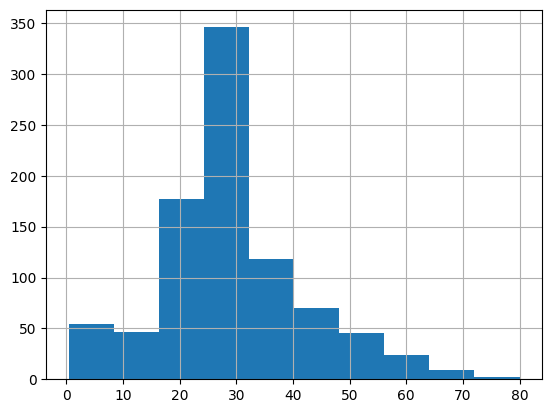

In [8]:
#Visualization
df1['Age'].hist()


<Axes: xlabel='Sex'>

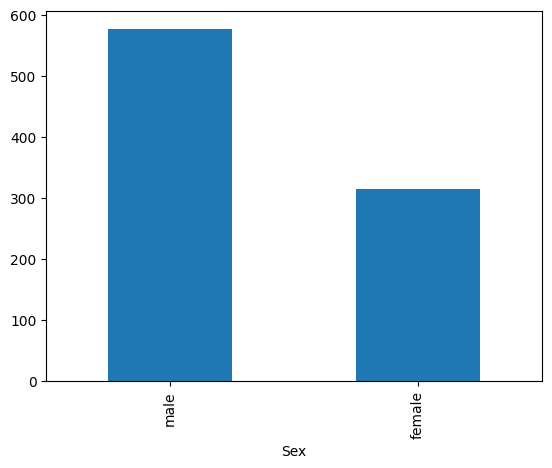

In [9]:
t=df1['Sex'].value_counts()
t
t.plot(kind='bar')


<Axes: xlabel='Survived'>

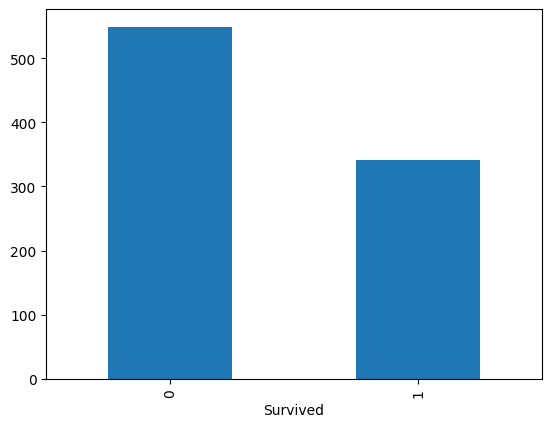

In [10]:
t1=df1.groupby('Survived').size()
t1

t1.plot(kind='bar')


<Axes: >

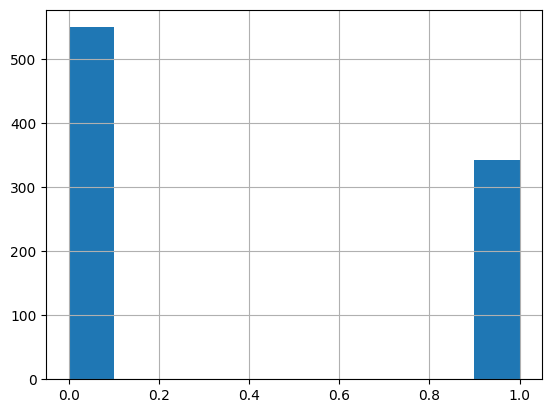

In [11]:
df1['Survived'].hist()


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

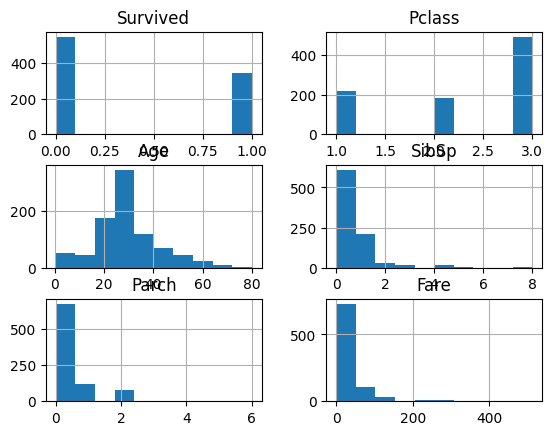

In [12]:
df1.hist()


(891, 8)

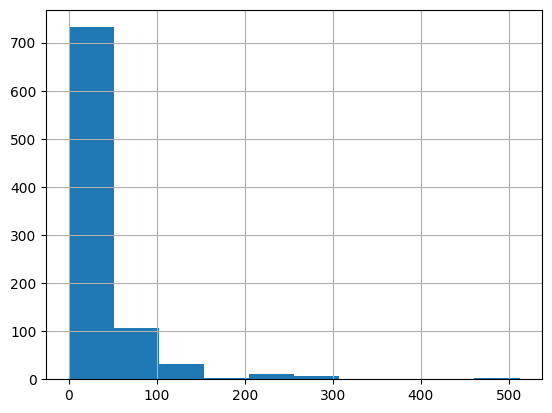

In [19]:
df1['Fare'].hist()
df1.shape



In [15]:
!pip install autoviz

Defaulting to user installation because normal site-packages is not writeable


In [20]:
from autoviz.AutoViz_Class import AutoViz_Class
AV= AutoViz_Class()
sep=","
dft=AV.AutoViz(df1,sep=",",depVar="",dfte=None,header=0,verbose=0,lowess=False,chart_format="svg",max_rows_analyzed=891,max_cols_analyzed=8,)

Imported v0.1.904. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (891, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 891 exceeds maximum, randomly sampling 891 rows for EDA...
2 numeric variables in data exceeds limit, taking top 8 variables
There are 111 duplicate rows in your dataset
    Alert: Dropping duplicate rows ca

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Survived,int64,0.000000,0,0.000000,1.000000,No issue
Pclass,int64,0.000000,0,1.000000,3.000000,No issue
Sex,object,0.000000,0,,,No issue
Age,float64,0.000000,NA,0.420000,80.000000,Column has 32 outliers greater than upper bound (57.38) or lower than lower bound(0.38). Cap them or remove them.
SibSp,int64,0.000000,0,0.000000,8.000000,Column has 39 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Parch,int64,0.000000,0,0.000000,6.000000,Column has 15 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Fare,float64,0.000000,NA,0.000000,512.329200,Column has 97 outliers greater than upper bound (73.86) or lower than lower bound(-31.44). Cap them or remove them.
Embarked,object,0.256410,0,,,"2 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"


Number of All Scatter Plots = 3
All Plots done
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [21]:
#data transformation 
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df1['Sex']=LE.fit_transform(df1['Sex'])
df1['Sex']


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [22]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df1['Embarked']=LE.fit_transform(df1['Embarked'])
df1['Embarked']


0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [23]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df1['Survived']=LE.fit_transform(df1['Survived'])
df1['Survived']


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [24]:
df2=df1[['Age']]
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_cont=SS.fit_transform(df2)
SS_cont=pd.DataFrame(SS_cont)
SS_cont.columns=[['Age']]
SS_cont


,Age
0,-0.592481
1,0.638789
2,-0.284663
3,0.407926
4,0.407926
...,...
886,-0.207709
887,-0.823344
888,0.000000
889,-0.284663


In [25]:
df2=df1[['Fare']]
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_cont=SS.fit_transform(df2)
SS_cont=pd.DataFrame(SS_cont)
SS_cont.columns=[['Fare']]
SS_cont


,Fare
0,-0.502445
1,0.786845
2,-0.488854
3,0.420730
4,-0.486337
...,...
886,-0.386671
887,-0.044381
888,-0.176263
889,-0.044381


In [26]:
#split the data XandY
Y=df1['Survived']
X=df1.iloc[:,1:8]
X


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [27]:
#Data partition
from sklearn.linear_model import LogisticRegression
LO= LogisticRegression() 
LO.fit(X,Y)
LO.intercept_
LO.coef_


array([[-1.04643065e+00, -2.62973146e+00, -3.82955881e-02,
        -3.15496001e-01, -9.26912798e-02,  2.19719063e-03,
        -2.11734179e-01]])

In [28]:
#model prediction
y_pred=LO.predict(X)
y_pred


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [29]:
#metrics
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y,y_pred)
cm


array([[473,  76],
       [102, 240]], dtype=int64)

In [30]:
ac1=accuracy_score(Y,y_pred)
print('Accuracy score:',(ac1*100).round(3))


Accuracy score: 80.022


In [ ]:
#Test data

In [31]:
df2= pd.read_csv("C:/Users/rajkr/OneDrive/Documents/LR1.csv")
df2
df2.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [33]:
df2.drop(df2.columns[0],axis=1,inplace=True)
df2.info()
df2.drop(df2.columns[1],axis=1,inplace=True)
df2.info()
df2.drop(df2.columns[5],axis=1,inplace=True)
df2.info()
df2.drop(df2.columns[6],axis=1,inplace=True)
df2.info()
df2.drop(df2.columns[0],axis=1,inplace=True)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-nul

In [34]:
df2['Age'].fillna(value=df2['Age'].mean(),inplace=True)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    object 
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Fare      417 non-null    float64
 5   Embarked  418 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [35]:
df2['Fare'].fillna(value=df2['Fare'].mean(),inplace=True)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    object 
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Fare      418 non-null    float64
 5   Embarked  418 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [36]:
#data transformation 
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df2['Sex']=LE.fit_transform(df2['Sex'])
df2['Sex']

from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df2['Embarked']=LE.fit_transform(df2['Embarked'])
df2['Embarked']


0      1
1      2
2      1
3      2
4      2
5      2
6      1
7      2
8      0
9      2
10     2
11     2
12     2
13     2
14     2
15     0
16     1
17     0
18     2
19     0
20     0
21     2
22     2
23     0
24     0
25     2
26     0
27     0
28     2
29     0
30     2
31     2
32     2
33     2
34     0
35     0
36     2
37     2
38     2
39     2
40     0
41     2
42     2
43     2
44     2
45     2
46     0
47     1
48     0
49     2
50     2
51     0
52     2
53     2
54     0
55     1
56     2
57     2
58     2
59     0
60     2
61     2
62     2
63     1
64     0
65     2
66     1
67     2
68     0
69     2
70     1
71     2
72     2
73     0
74     0
75     0
76     2
77     2
78     2
79     1
80     0
81     2
82     2
83     2
84     1
85     0
86     1
87     2
88     1
89     2
90     2
91     2
92     2
93     2
94     0
95     2
96     2
97     2
98     2
99     2
100    0
101    2
102    1
103    2
104    0
105    2
106    1
107    1
108    2
109    2
110    0
1

In [37]:
df3=df2[['Age']]
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_cont=SS.fit_transform(df3)
SS_cont=pd.DataFrame(SS_cont)
SS_cont.columns=[['Age']]
SS_cont

df3=df2[['Fare']]
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_cont=SS.fit_transform(df3)
SS_cont=pd.DataFrame(SS_cont)
SS_cont.columns=[['Fare']]
SS_cont


,Fare
0,-0.498407
1,-0.513274
2,-0.465088
3,-0.483466
4,-0.418471
5,-0.473381
6,-0.501993
7,-0.118823
8,-0.509165
9,-0.205781


In [38]:
#split
Y=df2['Sex']
X=df2.iloc[:,1:7]
X


,Age,SibSp,Parch,Fare,Embarked
0,34.50000,0,0,7.829200,1
1,47.00000,1,0,7.000000,2
2,62.00000,0,0,9.687500,1
3,27.00000,0,0,8.662500,2
4,22.00000,1,1,12.287500,2
5,14.00000,0,0,9.225000,2
6,30.00000,0,0,7.629200,1
7,26.00000,1,1,29.000000,2
8,18.00000,0,0,7.229200,0
9,21.00000,2,0,24.150000,2


In [39]:
#Data partition
from sklearn.linear_model import LogisticRegression
LO= LogisticRegression() 
LO.fit(X,Y)
LO.intercept_
LO.coef_


array([[ 0.00922453, -0.07733004, -0.23966349, -0.00643117,  0.12340525]])

In [40]:
#model prediction
y_pred=LO.predict(X)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [41]:
#metrics
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y,y_pred)
cm


array([[ 23, 129],
       [ 20, 246]], dtype=int64)

In [42]:
ac1=accuracy_score(Y,y_pred)
print('Accuracy score:',(ac1*100).round(3))


Accuracy score: 64.354


In [43]:
from sklearn.metrics import recall_score,precision_score,f1_score
print("sensitivityscore:",(recall_score(Y,y_pred)*100).round(2))
print("precisionscore:",(recall_score(Y,y_pred)*100).round(2))
print("f1score:",(recall_score(Y,y_pred)*100).round(2))


sensitivityscore: 92.48
precisionscore: 92.48
f1score: 92.48


In [44]:
LO.predict_proba(X)


array([[0.29564677, 0.70435323],
       [0.26214894, 0.73785106],
       [0.24790106, 0.75209894],
       [0.2855743 , 0.7144257 ],
       [0.37038917, 0.62961083],
       [0.31143044, 0.68856956],
       [0.30409131, 0.69590869],
       [0.38699416, 0.61300584],
       [0.35517616, 0.64482384],
       [0.3526601 , 0.6473399 ],
       [0.27846356, 0.72153644],
       [0.27274448, 0.72725552],
       [0.41838961, 0.58161039],
       [0.2572656 , 0.7427344 ],
       [0.33482978, 0.66517022],
       [0.39112268, 0.60887732],
       [0.30076601, 0.69923399],
       [0.34885775, 0.65114225],
       [0.30061106, 0.69938894],
       [0.30038764, 0.69961236],
       [0.37172544, 0.62827456],
       [0.36665597, 0.63334403],
       [0.31021502, 0.68978498],
       [0.49096956, 0.50903044],
       [0.82694183, 0.17305817],
       [0.26614523, 0.73385477],
       [0.48962861, 0.51037139],
       [0.34572125, 0.65427875],
       [0.28788474, 0.71211526],
       [0.38651581, 0.61348419],
       [0.

In [45]:
from sklearn.metrics import roc_curve,roc_auc_score
FPR,TPR,NULL=roc_curve(Y,LO.predict_proba(X)[:,1])
FPR
TPR


array([0.        , 0.0037594 , 0.03759398, 0.03759398, 0.10150376,
       0.10150376, 0.12781955, 0.13909774, 0.15413534, 0.16541353,
       0.18796992, 0.18796992, 0.19924812, 0.20676692, 0.21052632,
       0.22180451, 0.22180451, 0.23684211, 0.2443609 , 0.2518797 ,
       0.2556391 , 0.26315789, 0.26691729, 0.26691729, 0.30827068,
       0.30827068, 0.31578947, 0.32330827, 0.32706767, 0.32706767,
       0.33458647, 0.33458647, 0.34586466, 0.34962406, 0.34962406,
       0.36090226, 0.36090226, 0.36466165, 0.36466165, 0.36842105,
       0.36842105, 0.37593985, 0.37593985, 0.39849624, 0.39849624,
       0.40225564, 0.40601504, 0.40977444, 0.42105263, 0.42105263,
       0.42857143, 0.42857143, 0.43233083, 0.43233083, 0.45864662,
       0.45864662, 0.46616541, 0.46992481, 0.46992481, 0.47368421,
       0.5075188 , 0.5075188 , 0.5112782 , 0.5112782 , 0.51503759,
       0.51503759, 0.51879699, 0.51879699, 0.52255639, 0.52255639,
       0.53383459, 0.53383459, 0.54511278, 0.54511278, 0.55263

In [51]:
import matplotlib.pyplot as plt
plt.scatter(FPR,TPR)
plt.plot(FPR,TPR,color='red')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


In [49]:
auc= roc_auc_score(Y,LO.predict_proba(X)[:,1])
print("area under curve score",(auc*100).round(2))


area under curve score 67.96
